The representation graph offers a mathematical handle on YAML. These examples should help understanding the richness of such graph when using sequences, maps and nesting.

The bipartite graph is designed to hold the document structure. We show this higher-order structure and turn it into a simple graph taking equal scalars as the same nodes.

In [1]:
from itertools import combinations
import networkx as nx
import yaml
import xgi

from src import nx_yaml

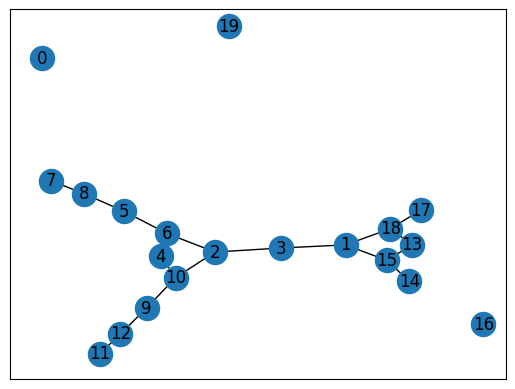

In [13]:
G = yaml.compose("""
- 1:
    2: 3
    4: 5
- {3, 4}
""", Loader=nx_yaml.NxSafeLoader)
nx.draw_networkx(G)

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x7faf6ebbb5f0>,
  <matplotlib.collections.LineCollection at 0x7faf6eba7dd0>))

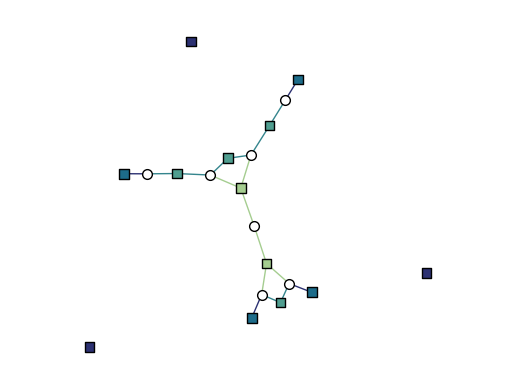

In [3]:
H2 = xgi.from_bipartite_graph(G)
xgi.draw_bipartite(H2)

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x7faf6ea9d3a0>,
  <matplotlib.collections.PatchCollection at 0x7faf6ead41d0>))

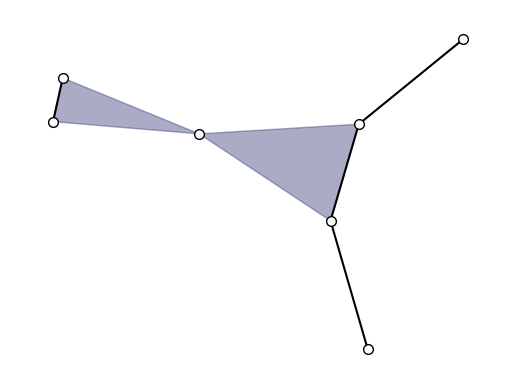

In [8]:
xgi.draw(H2)

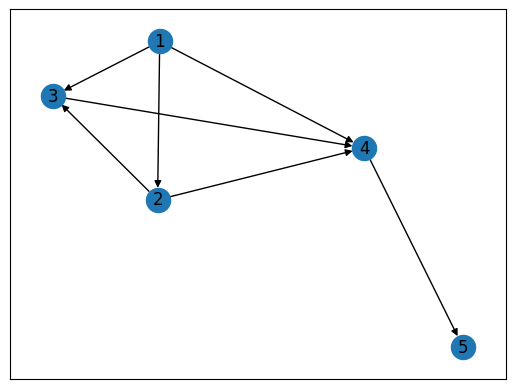

In [4]:
G0 = G
scalar_nodes = {d["value"] for n, d in G0.nodes(data=True) if d["bipartite"] == 0}
G2 = nx.DiGraph()
G2.add_nodes_from(scalar_nodes)
edge_nodes = {n for n, d in G0.nodes(data=True) if d["bipartite"] == 1}
for edge_node in edge_nodes:
    neighbors = [G0.nodes[n]["value"] for n in G0[edge_node]]
    G2.add_edges_from(combinations(neighbors, 2))
nx.draw_networkx(G2)